In [ ]:
!pip install flair
from google.colab import drive
drive.mount('/gdrive')

# Corpus reader

In [ ]:
from flair.datasets import UniversalDependenciesCorpus
from pathlib import Path
from typing import List, Union
import flair
from flair.data import Corpus
from flair.datasets.base import find_train_dev_test_files
from flair.file_utils import cached_path, unzip_file

class UD_UKRAINIAN(UniversalDependenciesCorpus):
    def __init__(self, base_path: Union[str, Path] = None, in_memory: bool = True, split_multiwords: bool = True):

        if type(base_path) == str:
            base_path: Path = Path(base_path)

        # this dataset name
        dataset_name = self.__class__.__name__.lower()

        # default dataset folder is the cache root
        if not base_path:
            base_path = flair.cache_root / "datasets"
        data_folder = base_path / dataset_name

        # download data if necessary
        ud_path = "https://raw.githubusercontent.com/UniversalDependencies/UD_Ukrainian-IU/master"
        cached_path(
            f"{ud_path}/uk_iu-ud-dev.conllu", Path("datasets") / dataset_name
        )
        cached_path(
            f"{ud_path}/uk_iu-ud-test.conllu", Path("datasets") / dataset_name
        )
        cached_path(
            f"{ud_path}/uk_iu-ud-train.conllu", Path("datasets") / dataset_name
        )

        super(UD_UKRAINIAN, self).__init__(data_folder, in_memory=in_memory, split_multiwords=split_multiwords)

# get the corpus
corpus: Corpus = UD_UKRAINIAN()

print(corpus)

# what tag do we want to predict?
tag_type = 'upos'

# make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

2022-02-10 22:38:58,071 https://raw.githubusercontent.com/UniversalDependencies/UD_Ukrainian-IU/master/uk_iu-ud-dev.conllu not found in cache, downloading to /tmp/tmp446x7d48


1805751B [00:00, 80067961.08B/s]         

2022-02-10 22:38:58,122 copying /tmp/tmp446x7d48 to cache at /root/.flair/datasets/ud_ukrainian/uk_iu-ud-dev.conllu
2022-02-10 22:38:58,128 removing temp file /tmp/tmp446x7d48


2022-02-10 22:38:58,526 https://raw.githubusercontent.com/UniversalDependencies/UD_Ukrainian-IU/master/uk_iu-ud-test.conllu not found in cache, downloading to /tmp/tmppnw49rkv


2485663B [00:00, 89569544.43B/s]         

2022-02-10 22:38:58,583 copying /tmp/tmppnw49rkv to cache at /root/.flair/datasets/ud_ukrainian/uk_iu-ud-test.conllu
2022-02-10 22:38:58,589 removing temp file /tmp/tmppnw49rkv


2022-02-10 22:39:00,211 https://raw.githubusercontent.com/UniversalDependencies/UD_Ukrainian-IU/master/uk_iu-ud-train.conllu not found in cache, downloading to /tmp/tmpbojksku4


13053081B [00:00, 98233703.28B/s] 

2022-02-10 22:39:00,382 copying /tmp/tmpbojksku4 to cache at /root/.flair/datasets/ud_ukrainian/uk_iu-ud-train.conllu
2022-02-10 22:39:00,396 removing temp file /tmp/tmpbojksku4
2022-02-10 22:39:00,398 Reading data from /root/.flair/datasets/ud_ukrainian
2022-02-10 22:39:00,399 Train: /root/.flair/datasets/ud_ukrainian/uk_iu-ud-train.conllu
2022-02-10 22:39:00,400 Dev: /root/.flair/datasets/ud_ukrainian/uk_iu-ud-dev.conllu
2022-02-10 22:39:00,401 Test: /root/.flair/datasets/ud_ukrainian/uk_iu-ud-test.conllu


Corpus: 5496 train + 672 dev + 892 test sentences


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.


Dictionary with 20 tags: O, ADP, NOUN, ADJ, PROPN, VERB, PUNCT, CCONJ, ADV, PRON, PART, DET, SCONJ, NUM, X, AUX, INTJ, SYM, <START>, <STOP>


# Training cycle

FastText(vocab=2665029, size=300, alpha=0.025)
2022-02-10 22:57:00,169 ----------------------------------------------------------------------------------------------------
2022-02-10 22:57:00,171 Model: "SequenceTagger(
  (embeddings): FastTextEmbeddings('/gdrive/MyDrive/UberGrid/vectors/cbow_weighted/baseline_cbow.bin')
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=300, out_features=300, bias=True)
  (rnn): LSTM(300, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=20, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2022-02-10 22:57:00,172 ----------------------------------------------------------------------------------------------------
2022-02-10 22:57:00,173 Corpus: "Corpus: 5496 train + 672 dev + 892 test sentences"
2022-02-10 22:57:00,174 ----------------------------------------------------------------------------------------------------
2022-02-1

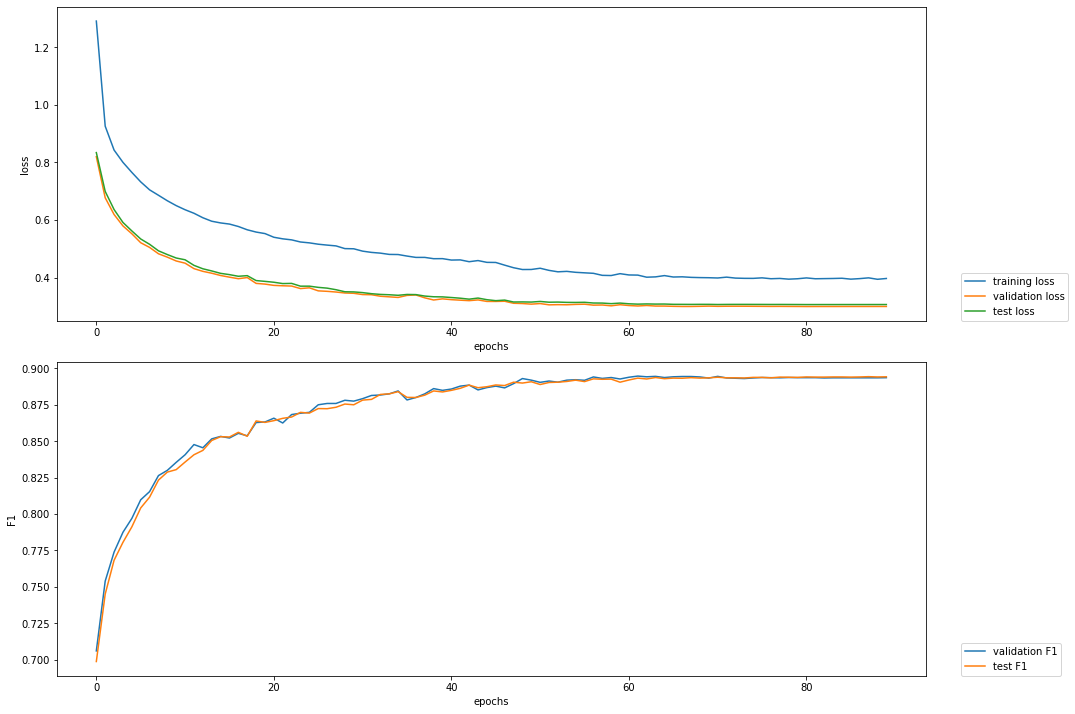

Weights plots are saved in /content/FlairPos/baseline_cbow/weights.png
copied '/content/FlairPos/baseline_cbow/best-model.pt' -> '/gdrive/MyDrive/extrinsic/FlairResults/baseline_cbow/best-model.pt'
removed '/content/FlairPos/baseline_cbow/best-model.pt'
copied '/content/FlairPos/baseline_cbow/dev.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/baseline_cbow/dev.tsv'
removed '/content/FlairPos/baseline_cbow/dev.tsv'
copied '/content/FlairPos/baseline_cbow/loss.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/baseline_cbow/loss.tsv'
removed '/content/FlairPos/baseline_cbow/loss.tsv'
copied '/content/FlairPos/baseline_cbow/test.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/baseline_cbow/test.tsv'
removed '/content/FlairPos/baseline_cbow/test.tsv'
copied '/content/FlairPos/baseline_cbow/training.log' -> '/gdrive/MyDrive/extrinsic/FlairResults/baseline_cbow/training.log'
removed '/content/FlairPos/baseline_cbow/training.log'
copied '/content/FlairPos/baseline_cbow/training.png' -> '/gdrive

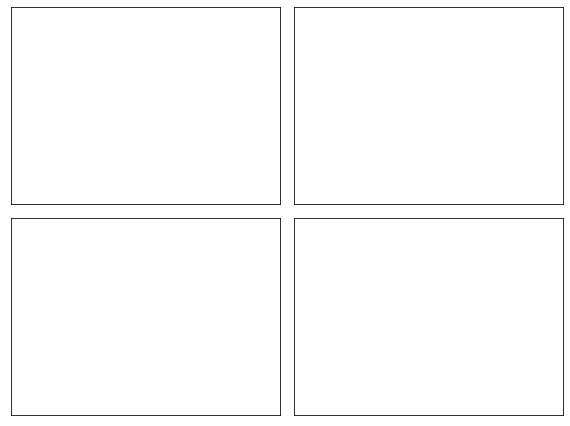

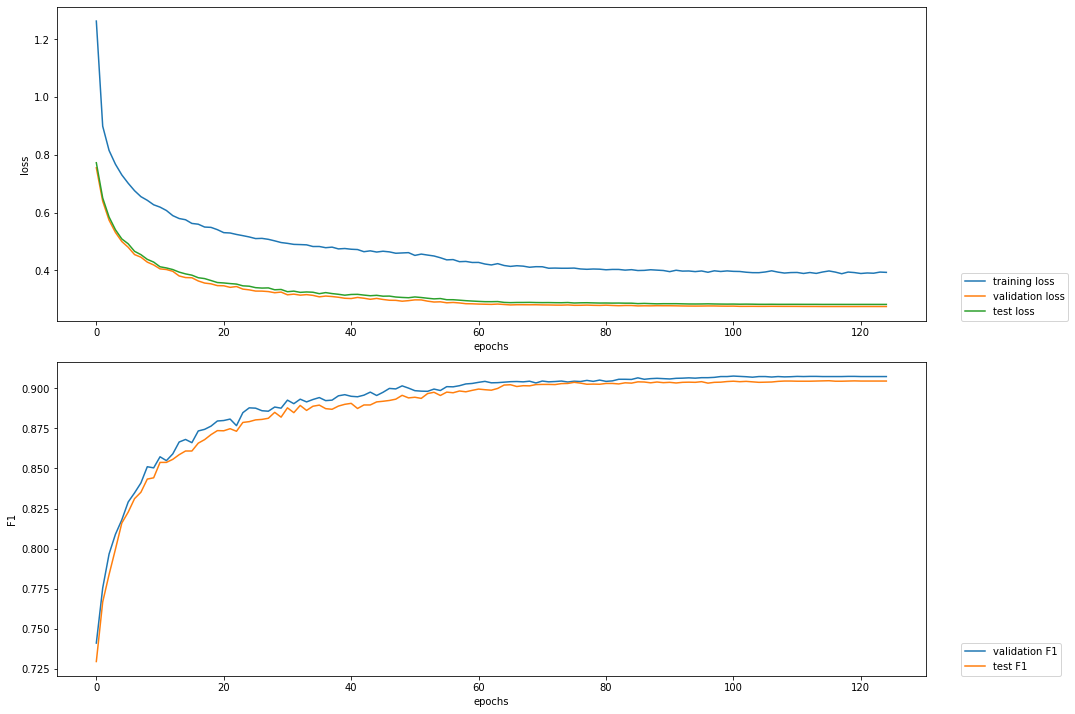

Weights plots are saved in /content/FlairPos/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/weights.png
copied '/content/FlairPos/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/best-model.pt' -> '/gdrive/MyDrive/extrinsic/FlairResults/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/best-model.pt'
removed '/content/FlairPos/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/best-model.pt'
copied '/content/FlairPos/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/dev.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/dev.tsv'
removed '/content/FlairPos/ubertext.fiction_news_wikipedia.filter_rus+short.tokens.txt.d300.subword5-5.cbow_weighted.epoch20/de

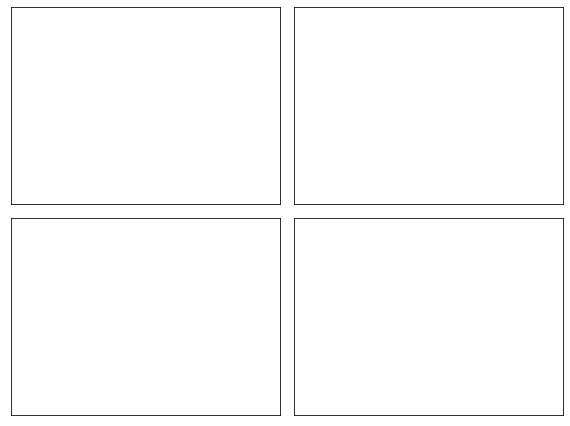

In [ ]:
import torch
import os.path
import shutil
import os
from glob import glob
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.embeddings import FastTextEmbeddings
from flair.visual.training_curves import Plotter

torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)

os.mkdir('/content/FlairPos/')

plotter = Plotter()


for f in glob("/gdrive/MyDrive/UberGrid/vectors/cbow_weighted/*"):
    binary_vecs, _ = os.path.splitext(os.path.basename(f))

    if os.path.exists(f"/gdrive/MyDrive/extrinsic/FlairResults/{binary_vecs}"):
        print(f"Skipping {binary_vecs} as their already exists")
        continue

    os.mkdir(f"/gdrive/MyDrive/extrinsic/FlairResults/{binary_vecs}")

    # initialize sequence tagger
    tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                            embeddings=FastTextEmbeddings(f),
                                            tag_dictionary=tag_dictionary,
                                            tag_type=tag_type)
    # initialize trainer
    trainer: ModelTrainer = ModelTrainer(tagger, corpus)

    # start training
    trainer.train(f"/content/FlairPos/{binary_vecs}",
                learning_rate=0.1,
                mini_batch_size=32,
                checkpoint=False,
                train_with_dev=False,
                monitor_test=True,
                max_epochs=150,
                embeddings_storage_mode='gpu')
    

    # plot learning curves
    plotter.plot_training_curves(f'/content/FlairPos/{binary_vecs}/loss.tsv')
    plotter.plot_weights(f'/content/FlairPos/{binary_vecs}/weights.txt')
     
    os.remove(f'/content/FlairPos/{binary_vecs}/final-model.pt')
    os.remove(f'/content/FlairPos/{binary_vecs}/weights.png')

    # move model to google drive
    !mv -v /content/FlairPos/{binary_vecs}/* /gdrive/MyDrive/extrinsic/FlairResults/{binary_vecs}/

# Write evaluation results

In [ ]:
import re
from pprint import pprint
from csv import DictWriter
from pathlib import Path
import os.path
from glob import glob
import json

mask = r"algo-([^.]+)\.epochs-(\d+)\.subwords-(\d+)\.\.(\d+)\.wordngram-(\d+).neg_sampling-(\d+)"

results_path = Path("/gdrive/MyDrive/extrinsic/FlairResults/POS/")

with (results_path / "flair_pos_eval.csv").open("w") as fp_out:
    w = DictWriter(fp_out, fieldnames=["vectors_file", "vectors_params", "Accuracy", "F-score (micro)", "F-score (macro)"])

    w.writeheader()

    for f in glob("/gdrive/MyDrive/UberGrid/vectors/*"):
        bf, _ = os.path.splitext(os.path.basename(f))
        meta_file = results_path / bf / "training.log"
        if not os.path.exists(meta_file):
            print(f"Cannot find file {meta_file}, skipping")
            continue

        m = re.search(mask, bf)
        if not m:
            print(f"Cannot parse filename {bf}")
            continue

        groups = m.groups()

        with open(meta_file, "r") as fp:
            for line in fp.readlines():
                if line.startswith("- Accuracy"):                  
                    accuracy  = float(line.split()[2])
                if line.startswith("- F-score (micro)"):
                    micro = float(line.split()[3])
                if line.startswith("- F-score (macro)"):
                    macro = float(line.split()[3])

            w.writerow({
                "vectors_file": bf,
                "vectors_params": f"{groups[0]};{groups[1]};{groups[2]}-{groups[3]};{groups[4]};{groups[5]}",
                "Accuracy":  accuracy,
                "F-score (micro)": micro,
                "F-score (macro)": macro
            })

# Learning curves

Loss and F1 plots are saved in /content/pos/training.png


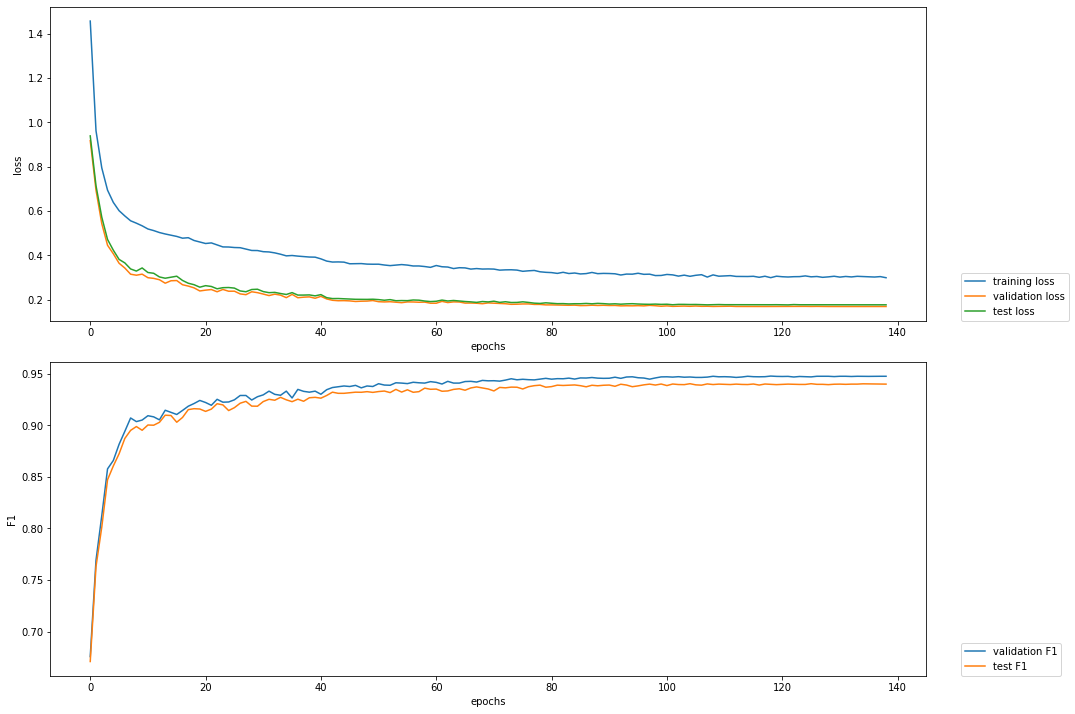

Weights plots are saved in /content/pos/weights.png
copied '/content/pos/best-model.pt' -> '/gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/best-model.pt'
removed '/content/pos/best-model.pt'
copied '/content/pos/dev.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/dev.tsv'
removed '/content/pos/dev.tsv'
copied '/content/pos/loss.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/loss.tsv'
removed '/content/pos/loss.tsv'
copied '/content/pos/test.tsv' -> '/gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/test.tsv'
removed '/content/pos/test.tsv'
copied '/content/pos/training.log' -> '/gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/training.log'
removed '/

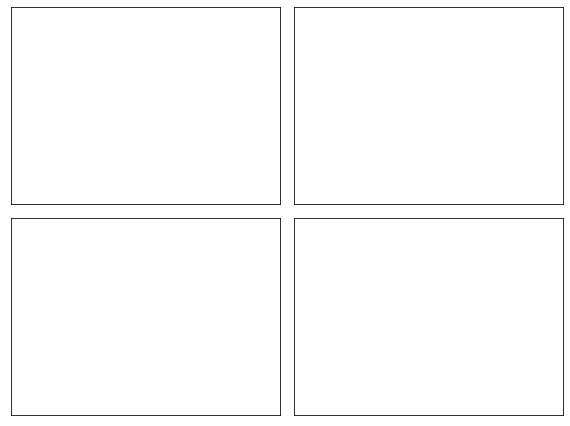

In [ ]:
# plot learning curves
plotter.plot_training_curves(f'/content/pos/loss.tsv')
plotter.plot_weights(f'/content/pos/weights.txt')
    
os.remove(f'/content/pos/weights.png')

# move model to google drive
!mv -v /content/pos/* /gdrive/MyDrive/extrinsic/FlairResults/cc.algo-cbow_weighted.epochs-10.subwords-5..5.wordngram-1.neg_sampling-10/